In [3]:
%pip install dataframe-image -q

DEPRECATION: omegaconf 2.0.6 has a non-standard dependency specifier PyYAML>=5.1.*. pip 24.1 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of omegaconf or contact the author to suggest that they release a version with a conforming dependency specifiers. Discussion can be found at https://github.com/pypa/pip/issues/12063
Note: you may need to restart the kernel to use updated packages.


In [4]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns


In [5]:
# https://cees-roele.medium.com/styling-complex-values-in-a-dataframe-7ebc5a17b3e7

In [6]:
max_value = 50
min_value = -50

In [7]:
cm = sns.light_palette("green", as_cmap=True)

In [8]:
def make_gradient(v, min_length, max_length, cmap):
    """
    Parameters
    ----------
    
    v: tuple of (word, length)
    min_length: int 
        minimum length of all words in the matrix
    max_length: int
        maximum length of all words in the matrix
    cmap: matplotlib color map, default value here is 'YlGn'
        
    Returns
    -------PRGn
    
    string:
        CSS setting a colour
              
    For Matplotlib colormaps:
    See: https://matplotlib.org/stable/tutorials/colors/colormaps.html
"""
    # normalize the word length as a fraction of the range 
    # between min_length and max_length
    rel_v = (v[1] - min_length) / (max_length - min_length)
    # define the colormap
    cmap = mpl.colormaps.get_cmap(cmap)
    # Get a colour out of the given colormap based on a value [0,1]
    rgba = cmap(rel_v)  
    # convert the colour to a hexadecimal string representation
    return f'background-color: {mpl.colors.rgb2hex(rgba)};'

In [18]:
def concatAndFormat(df1, df2, map):
    # #get the min value from all dataframe
    # min_value = 9999999999
    # max_value = -9999999999
    # for i in range(1,len(df1.values),2):
    #     if df1.iloc[i].astype(float).astype(int).min() < min_value:
    #         min_value = df1.iloc[i].astype(float).astype(int).min()
    #     if df1.iloc[i].astype(float).astype(int).max() > max_value:
    #         max_value = df1.iloc[i].astype(float).astype(int).max()

    df1_tuple = {}
    df2_tuple = {}
    list_of_super_concepts = ['Disability','Nationality','Religion','Sexual Orientation']
    list_of_super_concepts2 = ['Disability ','Nationality ','Religion ','Sexual Orientation ']
    list_of_concepts = ['Mental','Non','Physical','American','Arab','Chinese','Mexican','Buddhist','Christian','Hindu','Jewish','Muslim','Heterosexual','LGBT']
    concept = 0
    for i in range(0,len(list_of_concepts)*2,2):
        if concept < 3:
            super_concept = 0
        elif concept < 7:
            super_concept = 1
        elif concept < 12:
            super_concept = 2
        else:
            super_concept = 3
        df1_tuple[(list_of_super_concepts[super_concept],list_of_concepts[concept])] = list(zip(df1.iloc[i], df1.iloc[i+1].astype(float).astype(int)))
        if df2 is not None:
            df2_tuple[(list_of_super_concepts2[super_concept],list_of_concepts[concept])] = list(zip(df2.iloc[i], df2.iloc[i+1].astype(float).astype(int)))
        concept += 1
    
    df1 = pd.DataFrame(df1_tuple)
    df1 = df1.T
    if df2 is not None:
        df2 = pd.DataFrame(df2_tuple)
        df2 = df2.T
        df = pd.concat([df1,df2])
    else:
        df = df1
    df.style.format(lambda x: x[0])
    # We must apply both `format` and `applymap` to the DataFrame.style
    styler = df.style.format(lambda x: x[0])

    # min_length = df_values.min().min()
    # max_length = df_values.max().max()
    # styler.applymap(lambda x: make_gradient(x, min_value, max_value, sns.diverging_palette(10, 260, s=75, l=50, sep=1, n=9, center='light', as_cmap=True)))
    styler.applymap(lambda x: make_gradient(x, min_value, max_value, map))    
    styler.set_properties(**{'text-align': 'center'})
    styler.set_properties(**{'color': 'black'})
    display(styler)

    # Define the colormap
    gradient = np.linspace(0, 1, 256).reshape(1, -1)
    # Display the color palette
    plt.figure(figsize=(10, 0.2))
    plt.imshow(gradient, aspect='auto', cmap=map)
    plt.axis('off')
    plt.show()


In [10]:
my_map = sns.diverging_palette(10, 150, s=75, l=50, sep=1, n=9, center='light', as_cmap=True)

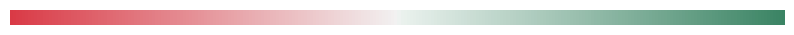

In [19]:
df1 = pd.read_csv('results/summary tables/Original Values/en-r0-originalvalue.csv')
df2 = pd.read_csv('results/summary tables/Original Values/br-r0-originalvalue.csv')

# df2 = pd.read_csv('results/summary tables/Original Values/en-r1-originalvalue.csv')
# df2 = pd.read_csv('results/summary tables/Original Values/br-r1-originalvalue.csv')

# df2 = None
concatAndFormat(df1,df2,my_map)

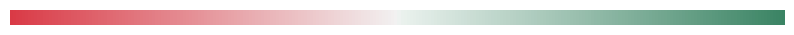

In [ ]:
df1 = pd.read_csv('results/summary tables/Mitigated Values/en-r0.csv')
df2 = pd.read_csv('results/summary tables/Original Values/en-r1-originalvalue.csv')
concatAndFormat(df1,df2,my_map)

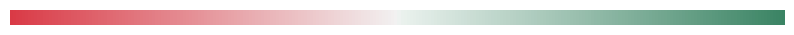

In [ ]:
df1 = pd.read_csv('results/summary tables/Mitigated Values/br-r0.csv')
df2 = pd.read_csv('results/summary tables/Original Values/br-r1-originalvalue.csv')
concatAndFormat(df1,df2,my_map)

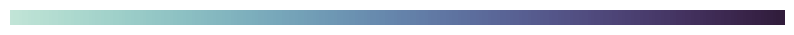

In [ ]:
df1 = pd.read_csv('results/summary tables/Mitigated Values/br-r0.csv')
df2 = pd.read_csv('results/summary tables/Original Values/br-r1-originalvalue.csv')
concatAndFormat(df1,df2,sns.cubehelix_palette(start=.5, rot=-.5, as_cmap=True))